# Parking Simulator
In this simulation we simulate a parking garage nearby a supermarket.
- https://www.centrumparkeren.nl/hilversum/parkeergarages/gooiland
- https://www.google.com/search?q=albert+heijn+gooialdn&oq=albert+heijn+gooialdn&aqs=chrome..69i57j0l2.13159j0j4&sourceid=chrome&ie=UTF-8


In [1]:
import simpy
import random

## CONSTANTinople
The birthplace of the constants

In [2]:
RANDOM_SEED = 42
SIM_TIME = 24 * 60

# The day hours
DAY_MIN = 8 * 60
DAY_MAX = 18 * 60

# MINUTE rate
MINUTE_RATE = 0.2 / 5

# Max price day
DAY_PRICE = 8
# Max price night
NIGHT_PRICE = 5

# The peak hours
PEAK_MIN = 15 * 60   # 15:00
PEAK_MAX = 20 * 60   # 20:00

# The maximum capacity of the garage
MAX_CAPACITY = 364

# Constants for the amount of time a car is parked
MIN_CAR_PARK_TIME = 1
MAX_CAR_PARK_TIME = 60

# Constants for finding a spot
MIN_FINDING_SPOT = 1
MAX_FINDING_SPOT = 5

# Constants for exiting the garage
MIN_EXITING_TIME = 1
MAX_EXITING_TIME = 3

In [3]:
def nrml_dist(min_, max_):
    """The function takes a minimal and maximal number and generates a number based on normal distribution"""
    mu = (max_ + min_) / 2
    sigma = mu / 3
    
    rd_numb = random.normalvariate(mu, sigma)
    
    if (rd_numb < min_):
        rd_numb = min_
    if (rd_numb > max_):
        rd_numb = max_
    
    return round(rd_numb)

In [4]:
class Garage(object):
    def __init__(self, env, max_spots=MAX_CAPACITY):
        self.env = env
        self.spots = simpy.Resource(env, max_spots)

In [5]:
def car(env, name, garage, data):
    """"""
    
    time_of_arrival = env.now
    
    # Request one of its charging spots
    print('%s arriving at %d' % (name, env.now))
    with garage.spots.request() as req:
        yield req
        
        time_of_assignment = env.now
        
        # Find spot
        print('%s finding parking spot %s' % (name, env.now))
        yield env.timeout(nrml_dist(MIN_FINDING_SPOT, MAX_FINDING_SPOT))

        # Park car
        print('%s starting to park %s' % (name, env.now))
        yield env.timeout(nrml_dist(MIN_CAR_PARK_TIME, MAX_CAR_PARK_TIME))
        
        # Leaving garage
        print('%s starting to leave %s' % (name, env.now))
        yield env.timeout(nrml_dist(MIN_EXITING_TIME, MAX_EXITING_TIME))
        
        time_of_departure = env.now
        print('%s left %s' % (name, time_of_departure))
        
        data.append((time_of_arrival, time_of_assignment, time_of_departure))
        

In [6]:
def new_cars_amount(is_peak):
    """"""
    
    total_cars = 0
    
    if is_peak:
        total_cars = 2
    else:
        total_cars = 1
        
    return total_cars

In [7]:
def calc_price(ToA, ToD):
    """ToA: time of assignment, ToD: time of departure"""
    delta_t = abs(ToD - ToA)
    if DAY_MIN < ToA < DAY_MAX: 
    # Price inside the day interval
        price = delta_t * MINUTE_RATE
        if price > DAY_PRICE:
            price = DAY_PRICE
    else:
    # Price outside the day interval
        price = delta_t * MINUTE_RATE
        if price > NIGHT_PRICE:
            price = NIGHT_PRICE
    
    return round(price, 2)

In [8]:
def setup(env, data):
    """"""
    garage = Garage(env)
    
    time_now = 0
    car_numb = 0
        
    while True:
        yield env.timeout(1)
        
        if (PEAK_MIN <= time_now <= PEAK_MAX):
            total_new_cars = new_cars_amount(True)
        else:
            total_new_cars = new_cars_amount(False)
        
        time_now += 1
        
        for i in range(total_new_cars):
            env.process(car(env, car_numb, garage, data))
            car_numb += 1

In [9]:
# Holds a list with all the data from the timestamps of the cars involved in the process
data = []

# For repeatability of the simulation we have chosen a random seed
random.seed(RANDOM_SEED)

# Create the environment
env = simpy.Environment()
# Begin the proces
env.process(setup(env, data))
# Run the simulation
env.run(until=SIM_TIME)

0 arriving at 1
0 finding parking spot 1
1 arriving at 2
1 finding parking spot 2
2 arriving at 3
2 finding parking spot 3
0 starting to park 4
3 arriving at 4
3 finding parking spot 4
1 starting to park 5
4 arriving at 5
4 finding parking spot 5
3 starting to park 6
5 arriving at 6
5 finding parking spot 6
2 starting to park 7
4 starting to park 7
6 arriving at 7
6 finding parking spot 7
7 arriving at 8
7 finding parking spot 8
5 starting to park 9
8 arriving at 9
8 finding parking spot 9
9 arriving at 10
9 finding parking spot 10
10 arriving at 11
10 finding parking spot 11
6 starting to park 12
11 arriving at 12
11 finding parking spot 12
7 starting to park 13
8 starting to park 13
12 arriving at 13
12 finding parking spot 13
9 starting to park 14
10 starting to park 14
11 starting to park 14
13 arriving at 14
13 finding parking spot 14
14 arriving at 15
14 finding parking spot 15
12 starting to park 16
15 arriving at 16
15 finding parking spot 16
13 starting to park 17
16 arriving 

390 finding parking spot 391
376 starting to leave 392
391 arriving at 392
391 finding parking spot 392
368 starting to leave 393
389 starting to park 393
350 left 393
363 left 393
390 starting to park 393
392 arriving at 393
392 finding parking spot 393
376 left 394
393 arriving at 394
393 finding parking spot 394
366 starting to leave 395
392 starting to park 395
394 arriving at 395
394 finding parking spot 395
391 starting to park 396
368 left 396
395 arriving at 396
395 finding parking spot 396
396 arriving at 397
395 starting to park 397
396 finding parking spot 397
366 left 398
394 starting to park 398
397 arriving at 398
397 finding parking spot 398
357 starting to leave 399
393 starting to park 399
396 starting to park 399
398 arriving at 399
398 finding parking spot 399
348 starting to leave 400
399 arriving at 400
399 finding parking spot 400
370 starting to leave 401
357 left 401
398 starting to park 401
400 arriving at 401
400 finding parking spot 401
349 starting to leave 

775 starting to park 780
732 left 780
748 left 780
777 starting to park 780
779 arriving at 780
779 finding parking spot 780
745 starting to leave 781
750 starting to leave 781
776 starting to park 781
741 left 781
778 starting to park 781
780 arriving at 781
780 finding parking spot 781
723 left 782
779 starting to park 782
781 arriving at 782
781 finding parking spot 782
745 left 783
750 left 783
782 arriving at 783
781 starting to park 783
782 finding parking spot 783
780 starting to park 784
783 arriving at 784
783 finding parking spot 784
739 starting to leave 785
743 starting to leave 785
784 arriving at 785
783 starting to park 785
784 finding parking spot 785
742 starting to leave 786
782 starting to park 786
743 left 786
785 arriving at 786
785 finding parking spot 786
737 starting to leave 787
768 starting to leave 787
739 left 787
786 arriving at 787
786 finding parking spot 787
744 starting to leave 788
762 starting to leave 788
787 arriving at 788
787 finding parking spot 

1164 finding parking spot 1033
1165 finding parking spot 1033
1158 starting to park 1034
1159 starting to park 1034
1160 starting to park 1034
1084 left 1034
1099 left 1034
1114 left 1034
1163 starting to park 1034
1166 arriving at 1034
1167 arriving at 1034
1166 finding parking spot 1034
1167 finding parking spot 1034
1162 starting to park 1035
1092 left 1035
1165 starting to park 1035
1168 arriving at 1035
1169 arriving at 1035
1168 finding parking spot 1035
1169 finding parking spot 1035
1141 starting to leave 1036
1085 left 1036
1164 starting to park 1036
1170 arriving at 1036
1171 arriving at 1036
1170 finding parking spot 1036
1171 finding parking spot 1036
1123 starting to leave 1037
1131 starting to leave 1037
1126 starting to leave 1037
1128 starting to leave 1037
1169 starting to park 1037
1141 left 1037
1172 arriving at 1037
1173 arriving at 1037
1172 finding parking spot 1037
1173 finding parking spot 1037
1115 starting to leave 1038
1167 starting to park 1038
1168 starting

1472 starting to park 1190
1389 left 1190
1478 arriving at 1190
1479 arriving at 1190
1478 finding parking spot 1190
1479 finding parking spot 1190
1403 starting to leave 1191
1413 starting to leave 1191
1424 starting to leave 1191
1394 left 1191
1396 left 1191
1401 left 1191
1422 left 1191
1473 starting to leave 1191
1476 starting to park 1191
1386 left 1191
1480 arriving at 1191
1481 arriving at 1191
1480 finding parking spot 1191
1481 finding parking spot 1191
1406 starting to leave 1192
1429 starting to leave 1192
1428 starting to leave 1192
1455 starting to leave 1192
1474 starting to park 1192
1475 starting to park 1192
1453 left 1192
1413 left 1192
1482 arriving at 1192
1483 arriving at 1192
1482 finding parking spot 1192
1483 finding parking spot 1192
1425 starting to leave 1193
1436 starting to leave 1193
1437 starting to leave 1193
1477 starting to park 1193
1478 starting to park 1193
1403 left 1193
1473 left 1193
1481 starting to park 1193
1406 left 1193
1484 arriving at 119

## Analysing the simulation

In [10]:
received_money = list(map(lambda x : calc_price(x[1], x[2]), data))
print("total money received: {0}".format(round(sum(received_money), 2)))

total money received: 2413.56


In [11]:
car_waiting_time = list(map(lambda x : abs(x[1] - x[0]), data))
# car_waiting_time

In [12]:
car_parking_time = list(map(lambda x : abs(x[2] - x[1]), data))
# car_parking_time

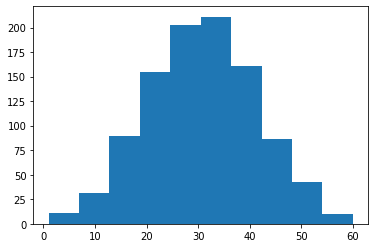

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
park_times = []

for i in range(1000):
    park_times.append(nrml_dist(MIN_CAR_PARK_TIME, MAX_CAR_PARK_TIME))

park_times.sort()
plt.hist(park_times)
plt.show()